<table style="width:100%">
    <tr>
        <td>
            <a href="http://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Appendix_Illustrations/Kleinian_group.html">
  <img src="../svg/view-html.svg" alt="View HTML"/>
            </a>
        </td>
        <td>
<a href="https://github.com/vvkisil/MoebInv-notebooks/blob/master/Appendix_Illustrations/Kleinian_group.ipynb">
  <img src="../svg/open-github.svg" alt="Open In GitHub"/>
            </a>
        </td>
        <td>
            <a href="https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Appendix_Illustrations/Kleinian_group.ipynb">
  <img src="../svg/exec-colab.svg" alt="Run In Colab"/>
            </a>
        </td>
        <td>
            <a href="https://codeocean.com/capsule/7952650/tree">
  <img src="../svg/code-ocean.svg" alt="Code Ocean"/>
            </a>
        </td>
    </tr>
 </table>

# Kleinian reflections

This notebook illustrates repeated reflections in a system of circular mirrors (called here *cycles* in line with the general framework).

First, we define a procedure which will make iterative reflections of a figure in the initial cycles.

In [12]:
def make_reflections(F, n : int):
    """The routine produces sequential reflection of the figure F
    in its all generation-0 cycles in a turn.
    n -- the number of reflections to perform.
    Since there is no predefined ordering for GiNaC object,
    every run of this routine can produce a different output."""

    # We are copying the figure to do not spoil the original with reflections.
    F0= figure(F)

    # All cycles at generation 0 a treated as mirrors
    mirrors = F0.get_all_keys(0, 0)
    Nm = len(mirrors)
    for i in range(n):
        # print(f"Make reflection in {mirrors[i % Nm]}")
        F0.reflection(mirrors[i % Nm], True, "", False)

    return figure(F0)

The simplicity of the above routine is possible due to advanced algorithms implemented in the library `figure`, which we are loading here.

In [13]:
from figure import *
from IPython.display import Image
show_asy_off()
%load_ext figure.figure_ipython

The figure extension is already loaded. To reload it, use:
  %reload_ext figure


Now we define a simple figure with only two cycles. We are adding a bit of colours to make illustration more vivid.

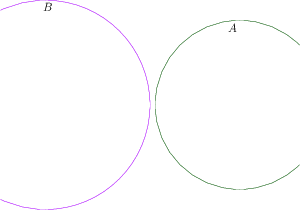

In [14]:
# We define a new figure with the following point and cycle metrics:
mir = figure()
mir.set_asy_style(mir.get_real_line(), "invisible")

# ## Cycles in generation 0
# The following cycles are defined by their coefficients
A = mir.add_cycle(cycle_data(1, matrix([[1.0, 0]]), -1), "A")
mir.set_asy_style(A, "rgb(0,0.333333,0)+solid+1pt")
B = mir.add_cycle(cycle_data(1, matrix([[-2.25, 0]]), 2), "B")
mir.set_asy_style(B, "rgb(0.666667,0,1)+solid+1pt")
%asy_write mir, 300, -3, 2, -3, 3, "mirrors"

For visualisation we have used the IPython magic here defined by the `figure` package. Otherwise a pair of commands
```
#mir.asy_write(300, -3, 2, -3, 3, "mirrors", "png", True, True, 0, "", True, False)
#Image("mirrors.png")
```
will produce the same effect.

Let us see what are the repeated reflections in these two cycles. 

**Technical:** We supplied the parameter `with_labels=False` to the method `asy_write()` because we do not want the appearance of cycles' labels: there will be too many cycles after reflections, their labels will make the picture messy.

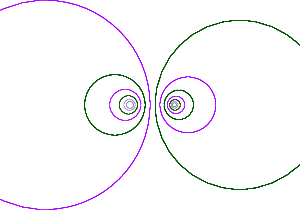

In [15]:
mir1 = make_reflections(mir, 6)
%asy_write mir1, 300, -3, 2, -3, 3, "mirrors2", with_labels=False

We got nested cycles from the pencil spanned by the initial two cycles. This can be verified as follows:

In [16]:
reflections = mir1.get_all_keys(1, 6)
AreInPencil = True
for R in reflections:
    AreInPencil = AreInPencil and mir1.check_rel(R, [A,B], 'pencil')[0].op(0).is_zero_matrix()

f"The reflection belongs to the pencil of mirrors: {AreInPencil}"

'The reflection belongs to the pencil of mirrors: True'

Let us add the third cycle to the figure...

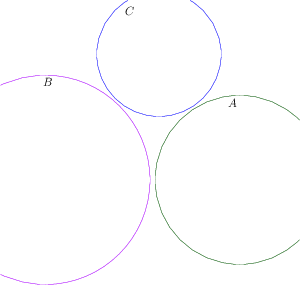

In [17]:
C = mir.add_cycle(cycle_data(1, matrix([[-0.35, 2.1]]), 3.45), "C")
mir.set_asy_style(C, "rgb(0,0,1)+solid+1pt")
%asy_write mir, 300, -3, 2, -3, 3, "mirrors"

...and produce reflections for them:

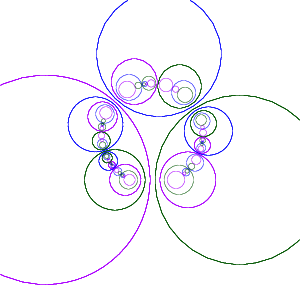

In [18]:
mir1 = make_reflections(mir, 6)
%asy_write mir1, 300, -3, 2, -3, 3, "mirrors3", with_labels=False

This time all images are located around the cycle orthogonal to three initial cycles. Let us add this cycle explicitly to visualise the relation:

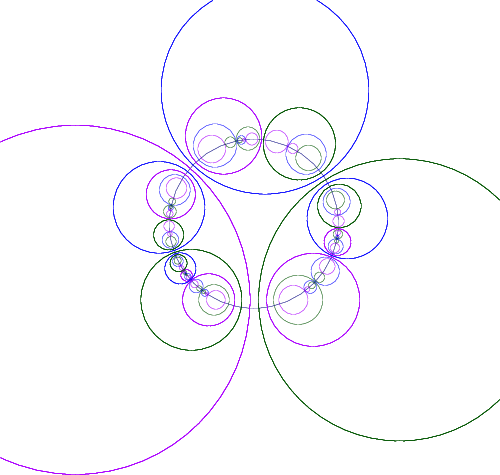

In [19]:
mir1.add_cycle_rel([is_orthogonal(A), is_orthogonal(B), is_orthogonal(C)], "E")
%asy_write mir1, 500, -3, 2, -3, 3, "mirrors3a", with_labels=False

Finally, let us add the fourth cycle,

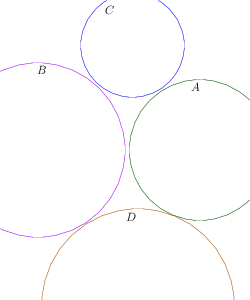

In [20]:
D = mir.add_cycle(cycle_data(1, matrix([[-0.24, -3.11]]), 6), "D")
mir.set_asy_style(D, "rgb(0.67,0.33,0)+solid+1pt")
%asy_write mir, 300, -3, 2, -3, 3, "mirrors", "png"

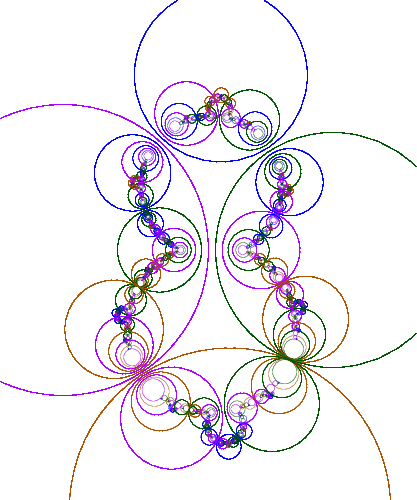

In [21]:
%asy_write make_reflections(mir, 12), 500,-3,2,-3,3,"mirrors4","png", with_labels=False

The next level of complexity appeared in the last image with all previous patterns still recognisable, of course. See illustrations of this type, called `the Schottky dance', in the book [ [1] ](#ref1), [Fig. 4.2](https://books.google.co.uk/books?id=XFE3jmSEfC8C&pg=PA99).

## Further info:
* [MoebInv library full documentation](https://sourceforge.net/projects/moebinv/files/docs/figure.pdf)
* [MoebInv Home page](http://moebinv.sourceforge.net/)
* [MoebInv  Notebooks](https://github.com/vvkisil/MoebInv-notebooks/blob/master/Table_of_contents.md)
* [MoebInv CodeOcean capsule](https://codeocean.com/capsule/7952650/tree)

## References
<a id="ref1"></a>
1. Mumford, David; Series, Caroline; Wright, David (2002), *Indra's pearls*, Cambridge University Press, ISBN 978-0-521-35253-6, MR 1913879